Initial Null Values:
 Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

Descriptive Statistics:
                             Premiere     Runtime  IMDB Score         Year
count                            579  584.000000  584.000000   579.000000
mean   2019-06-25 13:50:40.414507776   93.577055    6.271747  2018.953368
min              2014-12-13 00:00:00    4.000000    2.500000  2014.000000
25%              2018-07-02 12:00:00   86.000000    5.700000  2018.000000
50%              2019-10-18 00:00:00   97.000000    6.350000  2019.000000
75%              2020-09-25 12:00:00  108.000000    7.000000  2020.000000
max              2021-05-27 00:00:00  209.000000    9.000000  2021.000000
std                              NaN   27.761683    0.979256     1.465722

IMDb Score Frequency:
 IMDB Score
2.5     1
2.6     2
3.2     1
3.4     1
3.5     1
3.7     2
3.9     1
4.1     4
4.2     2
4.3     4
4.4     6
4.5     4
4.6     8
4.7     6
4.

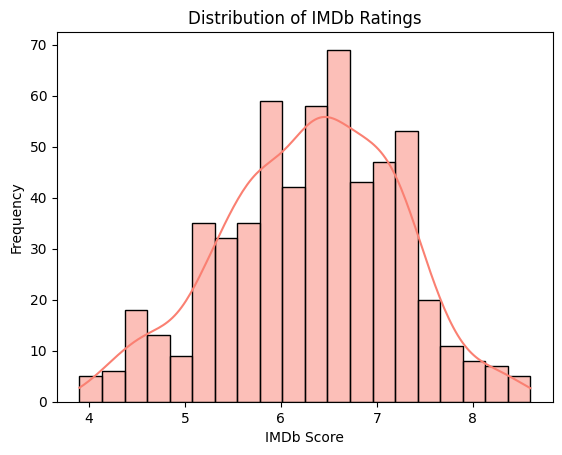

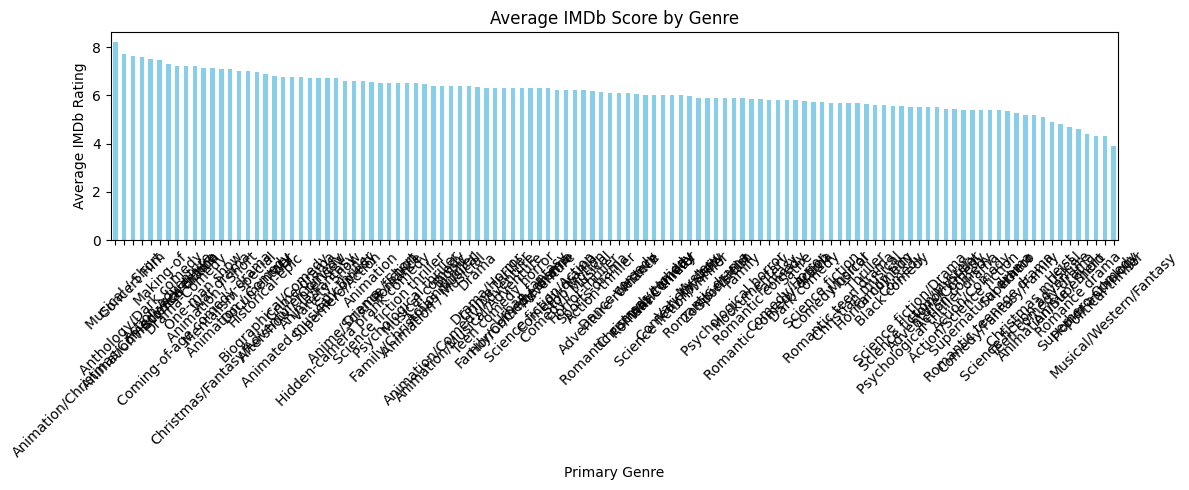

C:\Users\anasg\AppData\Local\Temp\ipykernel_22188\920384547.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', order=sorted(df['Year'].dropna().unique()), palette='viridis')


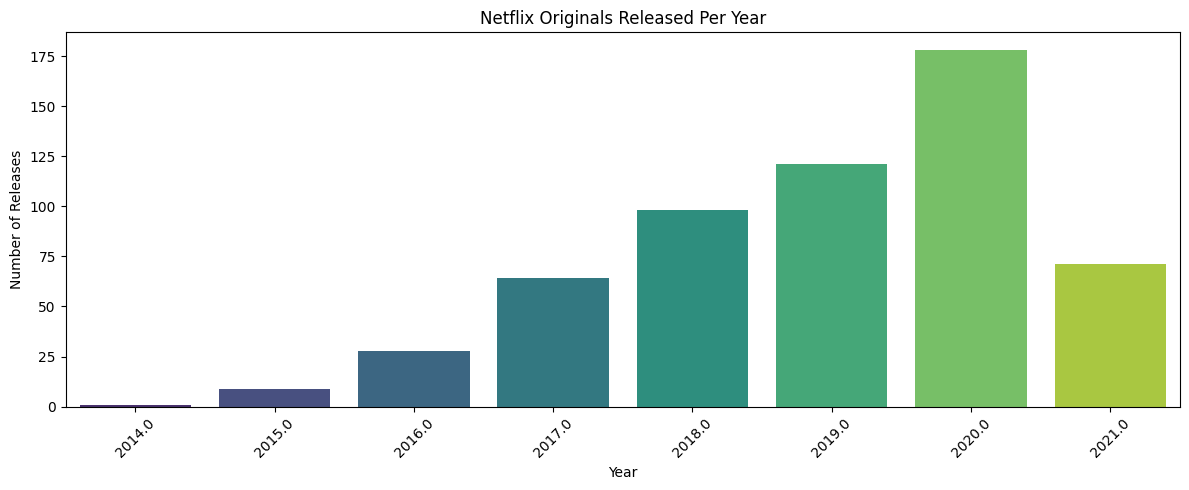

In [1]:
# Importing Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load and Clean Data
def load_and_clean_data(file_path):
    """Load the dataset, handle encodings, parse dates, and extract new features."""
    try:
        df = pd.read_csv(file_path, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='latin1')

    print("Initial Null Values:\n", df.isnull().sum())

    # Drop rows with missing IMDb scores
    df.dropna(subset=['IMDB Score'], inplace=True)

    # Convert 'Premiere' to datetime and extract year
    df['Premiere'] = pd.to_datetime(df['Premiere'], errors='coerce')
    df['Year'] = df['Premiere'].dt.year

    # Extract Primary Genre (first genre listed)
    df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

    return df

# Categorize IMDb Ratings
def categorize_ratings(df):
    """Add a new column for categorized rating levels."""
    def rating_category(score):
        if score >= 7:
            return 'High'
        elif score >= 5:
            return 'Medium'
        else:
            return 'Low'
    df['Rating Category'] = df['IMDB Score'].apply(rating_category)
    return df

# Summary Stats and Insights
def show_summary_stats(df):
    """Display basic statistics and frequency distribution."""
    print("\nDescriptive Statistics:\n", df.describe())
    print("\nIMDb Score Frequency:\n", df['IMDB Score'].value_counts().sort_index())

# Outlier Handling
def handle_outliers(df):
    """Remove outliers based on IQR method for IMDb Scores."""
    Q1 = df['IMDB Score'].quantile(0.25)
    Q3 = df['IMDB Score'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered_df = df[(df['IMDB Score'] >= lower) & (df['IMDB Score'] <= upper)]
    print(f"\nRemoved {len(df) - len(filtered_df)} outliers.")
    return filtered_df

# Plot: IMDb Score Distribution
def plot_imdb_distribution(df):
    sns.histplot(df['IMDB Score'], bins=20, kde=True, color='salmon')
    plt.title("Distribution of IMDb Ratings")
    plt.xlabel("IMDb Score")
    plt.ylabel("Frequency")
    plt.show()

# Plot: Average IMDb by Genre
def plot_genre_avg_imdb(df):
    genre_avg = df.groupby('Primary Genre')['IMDB Score'].mean().sort_values(ascending=False)
    genre_avg.plot(kind='bar', figsize=(12, 5), color='skyblue')
    plt.title("Average IMDb Score by Genre")
    plt.ylabel("Average IMDb Rating")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot: Releases per Year
def plot_releases_per_year(df):
    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x='Year', order=sorted(df['Year'].dropna().unique()), palette='viridis')
    plt.title("Netflix Originals Released Per Year")
    plt.xlabel("Year")
    plt.ylabel("Number of Releases")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot: Boxplot of IMDb by Genre
def plot_imdb_scores_by_genre(df):
    fig = px.box(df, x="Primary Genre", y="IMDB Score", points="all", title="IMDb Scores by Genre")
    fig.show()

# Main Function
def main():
    file_path = 'NetflixOriginals.csv'  # Update if needed
    df = load_and_clean_data(file_path)
    df = categorize_ratings(df)
    
    show_summary_stats(df)
    df = handle_outliers(df)

    # Visualizations
    plot_imdb_distribution(df)
    plot_genre_avg_imdb(df)
    plot_releases_per_year(df)
    plot_imdb_scores_by_genre(df)

# Entry Point
if __name__ == "__main__":
    main()
